<html>
<head>
<style>
body {background-color: powderblue;}
h1   {color: blue}
<style>
</head>
<body>

<h1>Movies Filmed in Vermont</>

<h1 style="background-color:MediumSeaGreen;"><strong> Movies filmed in Vermont </strong></h1>

<h3>Interactive Map - Click on a marker to reveal which movie was filmed where</h3
    
<p> A list of the most popular movies to be filmed in Vermont, though most of them were not entirely shot in Vermont. Fun fact, Bernie Sanders had a cameo in Sweet Hearsts Dance<p>




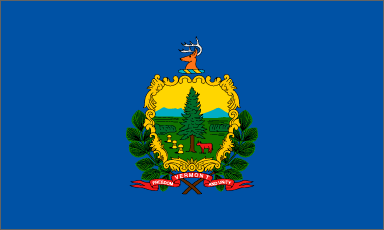

 State flag of Vermont

---

The libaries to be imported

In [1]:
from flask import Flask
import folium
from folium import plugins
from branca.element import Figure
import pandas as pd
import geopandas as gpd

Set the default size of our map

In [2]:
fig = Figure(width=550, height=550)

Read in the jsosn file that will outline the counties

In [3]:
coords = gpd.read_file("vermont-county-boundaries.geojson")
coords.head()

,cnty,len,area,cntyname,geometry
0,19,209703.889447536,1870297146.0138156,ORLEANS,"MULTIPOLYGON (((-71.92088 45.00785, -71.91398 ..."
1,13,130415.476828404,500854749.19205,GRAND ISLE,"MULTIPOLYGON (((-73.23344 44.66445, -73.23334 ..."
2,27,310320.434763568,2532057127.338112,WINDSOR,"MULTIPOLYGON (((-72.77108 43.93906, -72.77514 ..."
3,25,223985.430651128,2068202752.9067874,WINDHAM,"MULTIPOLYGON (((-72.70141 43.22633, -72.68544 ..."
4,3,215509.150749659,1753287168.8488,BENNINGTON,"MULTIPOLYGON (((-73.09610 43.30714, -73.09257 ..."


Read csv file containing data of the movies

In [4]:
movies = pd.read_csv('VTmoviesCoords.csv')
movies.head()

,Title,Year,Town,Address,Description,Other Info,Latitude,Longitude,URL,Starring
0,Star Trek,2009,Barre,"560 Graniteville Rd, Graniteville, VT 05654",Rock of Ages,NaN,44.156631,-72.491407,https://www.imdb.com/title/tt0796366/?ref_=fn_...,Chris Pine
1,Forrest Gump,1993,Reading,"1279-1163, Jenne Rd, Reading, VT 05062",Jenne Farm,NaN,43.523551,-72.559982,https://www.imdb.com/title/tt0109830/?ref_=fn_...,Tom Hanks
2,Beetle Juice,1988,East Cornith,"1 Chicken Farm Rd, East Corinth, VT 05040",Bridge on Chicken Farm Rd,NaN,44.064002,-72.222223,https://www.imdb.com/title/tt0094721/?ref_=nv_...,Michael Keaton
3,Baby Boom,1987,Peru,"Baby Boom House, Peru, VT 05152",Diane Keaton movie,NaN,43.234866,-72.878444,https://www.imdb.com/title/tt0092605/?ref_=fn_...,Diane Keaton
4,The Four Seasons,1981,Stowe,"434 Edson Hill Rd, Stowe, VT 05672",Stowehof Inn,NaN,44.494512,-72.725772,https://www.imdb.com/title/tt0082405/?ref_=fn_...,Alan Alda


Drop anything we do not need

In [5]:
movies.drop(columns=['Other Info'],axis=1, inplace=True)
movies.head(2)

,Title,Year,Town,Address,Description,Latitude,Longitude,URL,Starring
0,Star Trek,2009,Barre,"560 Graniteville Rd, Graniteville, VT 05654",Rock of Ages,44.156631,-72.491407,https://www.imdb.com/title/tt0796366/?ref_=fn_...,Chris Pine
1,Forrest Gump,1993,Reading,"1279-1163, Jenne Rd, Reading, VT 05062",Jenne Farm,43.523551,-72.559982,https://www.imdb.com/title/tt0109830/?ref_=fn_...,Tom Hanks


General info about each column in the dataset

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        13 non-null     object 
 1   Year         13 non-null     int64  
 2   Town         13 non-null     object 
 3   Address      13 non-null     object 
 4   Description  13 non-null     object 
 5   Latitude     13 non-null     float64
 6   Longitude    13 non-null     float64
 7   URL          13 non-null     object 
 8   Starring     13 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.0+ KB


Create the map and set a few parameters

In [7]:
map = folium.Map(location=[44.000000, -72.699997],
                 zoom_start=5, 
                 min_zoom=8, 
                 max_zoom=22,
                 tiles ="http://services.arcgisonline.com/arcgis/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}",
                 attr= "Sources: National Geographic, Esri, Garmin")

Iterate through the rows of the jsosn file and add the polygon outlines to our base map

In [8]:
for _, r in coords.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                          style_function=lambda x: {
                              'color': 'black',
                              'weight': 2.5,
                              'fillOpacity': 0
                          },name='County').add_to(map)
    folium.Popup(r['cntyname']).add_to(geo_j)
    geo_j.add_to(map)

A function with some html to define what are pop up markers will display

In [9]:
def popup_html(row):
    i = row
    lat = movies['Latitude'].iloc[i]
    lon = movies['Longitude'].iloc[i]
    year = movies['Year'].iloc[i]
    title = movies['Title'].iloc[i]
    town = movies['Town'].iloc[i]
    url = movies['URL'].iloc[i]
    star = movies['Starring'].iloc[i]

    left_col_color = "#85929E"
    right_col_color = "#f2f9ff"

    html = """
    <!DOCTYPE html>
    <html>
    <center><h4 style="margin-bottom:5"; width="200px">{}</h4>""".format(title) + """</center>
        
    <center><a href=\"""" + url + """\">Click here to view the movie's IMDb page</a></center>
    
    <center> <table style="height: 115px; width: 250px;">
    
    <tbody>
    <figure>
     <a title="Internet Movie Database, Public domain, via Wikimedia Commons" 
     href="https://commons.wikimedia.org/wiki/File:IMDB_Logo_2016.svg">
     <img width="100" alt="IMDB Logo 2016" 
     src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/IMDB_Logo_2016.svg/512px-IMDB_Logo_2016.svg.png">
     </a>
    </figure
    <tr>
    <td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Town filmed in </span></td>
    <td style="width: 150px;background-color: """+ right_col_color +""";">"""+""+town + """</td>
    </tr>
    <tr>
    <td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Year of filming </span></td>
    <td style="width: 130px;background-color: """+ right_col_color +""";">{}</td>""".format(year) + """
    
    <tr>
   <td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Starring </span></td>
    <td style="width: 150px;background-color: """+ right_col_color +""";">"""+ star + """</td>

    </tbody>
    </table></center>
    </html>
    """
    return html

Go through the movie data and define color for markers depending on Year.
Set location of each marker based on coordinates of each film.

Add the function, icons and everything else to main basemap.

In [10]:
for i in range(0, len(movies)):
    year = movies['Year'].iloc[i]
    if year <= 1989:
        color = 'green'
    elif year <= 1999:
        color = 'orange'
    else:
        color = 'blue'
    html = popup_html(i)
    popup= folium.Popup(folium.Html(html, script=True), max_width=500)
    folium.Marker([movies['Latitude'].iloc[i], 
                           movies['Longitude'].iloc[i]],
                           popup=popup,
                           icon=folium.Icon(color=color, icon='fa-imdb', prefix='fa')).add_to(map)

Display the updated map

In [11]:
map

In [12]:
map.save("Movies_In_Vermont.html")